In [ ]:
%pip install pingouin

In [3]:
import pandas as pd
import seaborn as sns
import pingouin as png

In [53]:
raw = pd.read_csv("https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/Sentence-verification/2021/sentence-verification.csv")

In [54]:
print(list(raw))

['acc', 'accuracy', 'average_response_time', 'avg_rt', 'background', 'bidi', 'browser_codename', 'browser_name', 'browser_version', 'canvas_backend', 'clock_backend', 'color_backend', 'compensation', 'condition', 'coordinates', 'correct', 'correct_keyboard_response', 'correct_response', 'count_ISI', 'count_block_one', 'count_block_two', 'count_break', 'count_experiment', 'count_fixation', 'count_instructions1', 'count_instructions2', 'count_instructions3', 'count_instructions4', 'count_keyboard_response', 'count_logger', 'count_new_inline_javascript', 'count_osweb', 'count_stim', 'count_trial_sequence', 'date_startdate', 'date_startdateUTC', 'date_starttime', 'datetime', 'description', 'disable_garbage_collection', 'experiment_debug', 'experiment_parameters', 'experiment_path', 'experiment_pilot', 'experiment_taskname', 'experiment_taskversion', 'false_response', 'font_bold', 'font_family', 'font_italic', 'font_size', 'font_underline', 'foreground', 'form_clicks', 'fullscreen', 'height

In [55]:
len(set(list(raw['sessionid'])))

24

In [56]:
#'condition'
#'true_false'
#'correct_response'
#'response_stim
#'response_time_stim'
#'stim'

df = pd.DataFrame(
    {'participantID': raw['sessionid'],
     'true_false': raw['true_false'],
     'correct_response': raw['correct_response'],
     'rt': raw['response_time_stim'],
     'response': raw['response_stim'],
     'condition': raw['condition'],
     'sentence': raw['stim']
    })

df


,participantID,true_false,correct_response,rt,response,condition,sentence
0,1637220363788,False,z,4054,z,P2,Bourbon is gritty.
1,1637220363788,False,z,3234,m,SO,A parakeet is an eagle.
2,1637220363788,False,z,3246,z,SO,Chicago is a state.
3,1637220363788,True,m,4086,m,PO,A canary can sing.
4,1637220363788,False,z,3957,z,P1,A canoe has a sail.
...,...,...,...,...,...,...,...
1915,1637139403850,False,m,1425,m,P1,A shrimp can fly.
1916,1637139291277,False,z,2034,m,P1,Table tennis has baskets.
1917,1637139291277,True,m,1355,m,P1,A schooner has a rudder.
1918,1637139291277,False,z,1031,m,PO,Checkers has pawns.


In [75]:
condition = []

for x in list(df['condition']):
    if x == 'S2.':
        condition.append('S2')
    else:
        condition.append(x)

df['condition'] = condition

# Change "PO" to "P0"
condition = []
for x in list(df['condition']):
    if x == 'PO':
        condition.append('P0')
    else:
        condition.append(x)
        
df['condition'] = condition


# Change "SO" to "S0"
condition = []
for x in list(df['condition']):
    if x == 'SO':
        condition.append('S0')
    else:
        condition.append(x)
        
df['condition'] = condition

In [76]:
df['correct'] = (df['correct_response'] == df['response']).astype(int)
df

,participantID,true_false,correct_response,rt,response,condition,sentence,correct
1261,1637144433406,False,m,3378,m,P0,Checkers has pawns.,1
1314,1637144479367,False,z,1757,z,P0,Miami has snow.,1
191,1637220153452,True,m,1515,m,P0,A rifle is long.,1
192,1637220153452,False,z,998,z,P0,A berry is large.,1
193,1637220153452,False,z,1025,z,P0,Tequila is carbonated.,1
...,...,...,...,...,...,...,...,...
938,1637144464101,True,z,2109,z,S2,A corporal is a person.,1
960,1637144464101,False,m,949,m,S2,Cognac is gas.,1
831,1637220071937,True,z,3472,z,S2,An elm is a plant.,1
1243,1637144433406,False,m,2059,m,S2,Cognac is gas.,1


In [77]:
df[df['condition'] == 'S2']

,participantID,true_false,correct_response,rt,response,condition,sentence,correct
85,1637220160839,True,z,1537,z,S2,An elm is a plant.,1
1502,1637144466044,False,m,3624,m,S2,A mesquite is a mineral.,1
107,1637220153452,False,z,2844,z,S2,A general is a monkey.,1
1763,1637144404587,False,m,4370,m,S2,A mesquite is a mineral.,1
27,1637220160839,True,z,1735,z,S2,A corporal is a person.,1
...,...,...,...,...,...,...,...,...
938,1637144464101,True,z,2109,z,S2,A corporal is a person.,1
960,1637144464101,False,m,949,m,S2,Cognac is gas.,1
831,1637220071937,True,z,3472,z,S2,An elm is a plant.,1
1243,1637144433406,False,m,2059,m,S2,Cognac is gas.,1


In [78]:
df = df.drop_duplicates()

In [79]:
df[df['correct'] == 1].shape

(1628, 8)

In [80]:
df = df[df['correct'] == 1]

<AxesSubplot:xlabel='condition', ylabel='rt'>

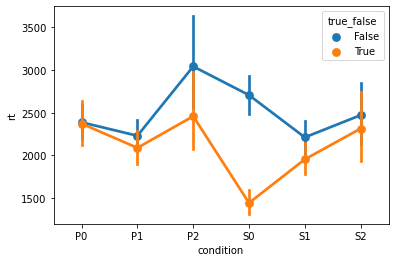

In [81]:
sns.pointplot(data = df, x = 'condition', y = 'rt', hue = 'true_false')

In [82]:
df = df.sort_values('condition')

<AxesSubplot:xlabel='condition', ylabel='rt'>

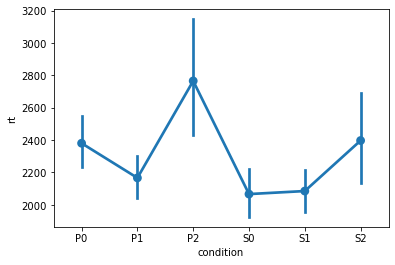

In [85]:
sns.pointplot(data = df, x = 'condition', y = 'rt')

In [86]:
df.head()

,participantID,true_false,correct_response,rt,response,condition,sentence,correct
1261,1637144433406,False,m,3378,m,P0,Checkers has pawns.,1
1853,1637144501002,False,z,2631,z,P0,A crow is green.,1
777,1637220071937,True,z,6790,z,P0,San Francisco has fog.,1
521,1637220065369,False,z,1218,z,P0,Fudge is sour.,1
763,1637220081486,True,m,3427,m,P0,A tugboat can pull.,1


In [87]:
p_data = df.loc[((df['condition'] == 'P0') | (df['condition'] == 'P1') | (df['condition'] == 'P2'))]

s_data = df.loc[((df['condition'] == 'S0') | (df['condition'] == 'S1') | (df['condition'] == 'S2'))]

In [88]:
p_data['type'] = ['property']*p_data.shape[0]

level = []

for i in list(p_data['condition']):
    if i == 'P0':
        level.append('0')
    elif i == 'P1':
        level.append('1')
    elif i == 'P2':
        level.append('2')
p_data['level'] = level

s_data['type'] = ['superset']*s_data.shape[0]

level = []
for i in list(s_data['condition']):
    if i == 'S0':
        level.append('0')
    elif i == 'S1':
        level.append('1')
    elif i == 'S2':
        level.append('2')
s_data['level'] = level

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [89]:
p_data

,participantID,true_false,correct_response,rt,response,condition,sentence,correct,type,level
1261,1637144433406,False,m,3378,m,P0,Checkers has pawns.,1,property,0
1853,1637144501002,False,z,2631,z,P0,A crow is green.,1,property,0
777,1637220071937,True,z,6790,z,P0,San Francisco has fog.,1,property,0
521,1637220065369,False,z,1218,z,P0,Fudge is sour.,1,property,0
763,1637220081486,True,m,3427,m,P0,A tugboat can pull.,1,property,0
...,...,...,...,...,...,...,...,...,...,...
1812,1637144501002,True,m,2069,m,P2,Gin is wet.,1,property,2
1378,1637144430187,True,z,2076,z,P2,A birch has seeds.,1,property,2
1610,1637144445325,True,m,2228,m,P2,A lieutenant can talk.,1,property,2
1311,1637144479367,False,z,3858,z,P2,A sycamore has fruit.,1,property,2


In [90]:
s_data

,participantID,true_false,correct_response,rt,response,condition,sentence,correct,type,level
1572,1637144445325,False,z,3729,z,S0,Chicago is a state.,1,superset,0
1071,1637144526426,False,z,2933,z,S0,A petunia is thorny.,1,superset,0
1076,1637144526426,False,z,2975,z,S0,A bass is a crab.,1,superset,0
1580,1637144445325,True,m,1188,m,S0,Boston is Boston.,1,superset,0
1042,1637144526426,False,z,2553,z,S0,A parakeet is an eagle.,1,superset,0
...,...,...,...,...,...,...,...,...,...,...
1784,1637144404587,False,m,1442,m,S2,A general is a monkey.,1,superset,2
1839,1637144501002,True,m,2263,m,S2,A corporal is a person.,1,superset,2
1628,1637144445325,False,z,1413,z,S2,A general is a monkey.,1,superset,2
1061,1637144526426,False,z,1957,z,S2,A general is a monkey.,1,superset,2


In [91]:
df = pd.concat([p_data, s_data])
df.head()

,participantID,true_false,correct_response,rt,response,condition,sentence,correct,type,level
1261,1637144433406,False,m,3378,m,P0,Checkers has pawns.,1,property,0
1853,1637144501002,False,z,2631,z,P0,A crow is green.,1,property,0
777,1637220071937,True,z,6790,z,P0,San Francisco has fog.,1,property,0
521,1637220065369,False,z,1218,z,P0,Fudge is sour.,1,property,0
763,1637220081486,True,m,3427,m,P0,A tugboat can pull.,1,property,0


<AxesSubplot:xlabel='level', ylabel='rt'>

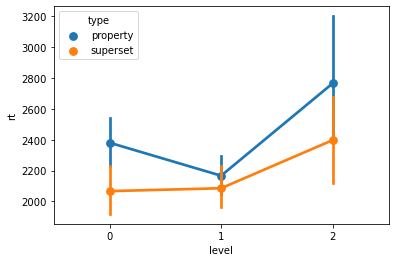

In [92]:
sns.pointplot(data = df, x = 'level', y = 'rt', hue = 'type')

In [93]:
df.rm_anova(dv = 'rt', within = ['type','level'], subject = 'participantID')

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,type,3.018301e+06,1,21,3.018301e+06,9.154543,0.006433,0.006433,0.303588,1.000000
1,level,3.388259e+06,2,42,1.694129e+06,5.954282,0.005290,0.012488,0.220903,0.712147
2,type * level,5.157974e+05,2,42,2.578987e+05,1.134269,0.331312,0.322515,0.051245,0.795406


In [95]:
df.pairwise_ttests(dv = 'rt', within = ['type','level'], subject = 'participantID', padjust = 'holm')

,Contrast,type,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,type,-,property,superset,True,True,3.025647,21.0,two-sided,0.006433,NaN,NaN,7.212,0.399038
1,level,-,0,1,True,True,1.333889,21.0,two-sided,0.196527,0.196527,holm,0.486,0.133477
2,level,-,0,2,True,True,-2.189834,21.0,two-sided,0.039967,0.079933,holm,1.603,-0.342255
3,level,-,1,2,True,True,-2.870394,21.0,two-sided,0.009158,0.027473,holm,5.356,-0.454705
4,type * level,property,0,1,True,True,2.032817,21.0,two-sided,0.054907,0.274533,holm,1.248,0.256657
5,type * level,property,0,2,True,True,-1.722182,21.0,two-sided,0.099734,0.398937,holm,0.791,-0.297740
6,type * level,property,1,2,True,True,-3.003451,21.0,two-sided,0.006768,0.040609,holm,6.909,-0.482924
7,type * level,superset,0,1,True,True,-0.153712,21.0,two-sided,0.879305,0.879305,holm,0.225,-0.023341
8,type * level,superset,0,2,True,True,-1.549432,21.0,two-sided,0.136218,0.408654,holm,0.629,-0.335036
9,type * level,superset,1,2,True,True,-1.339964,21.0,two-sided,0.194577,0.408654,holm,0.489,-0.303484
